In [1]:
# %% Import Libraries
#This is a test
import os
import pickle
import scipy.io
import numpy as np
import pandas as pd
import torch as tc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import ruptures as rpt
from scipy.stats import zscore

import matplotlib.patches as mpatches
from tqdm import tqdm
from bptt.models import Model
import model_anafunctions as func


plt.rcParams['font.size'] = 20

c:\Users\cestarellas\anaconda3\envs\PLAna\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


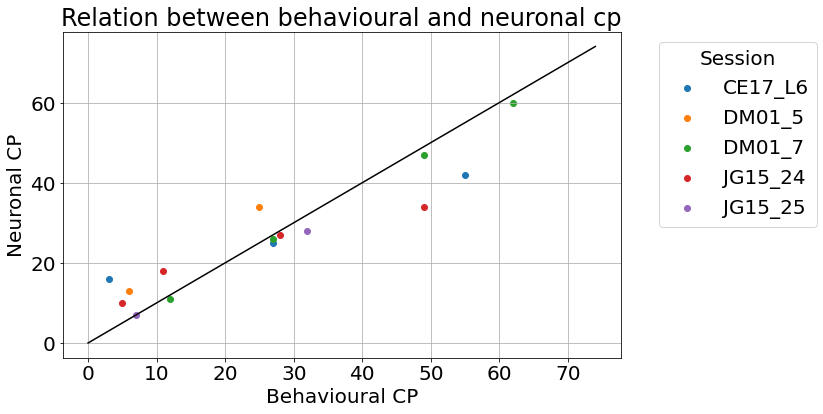

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


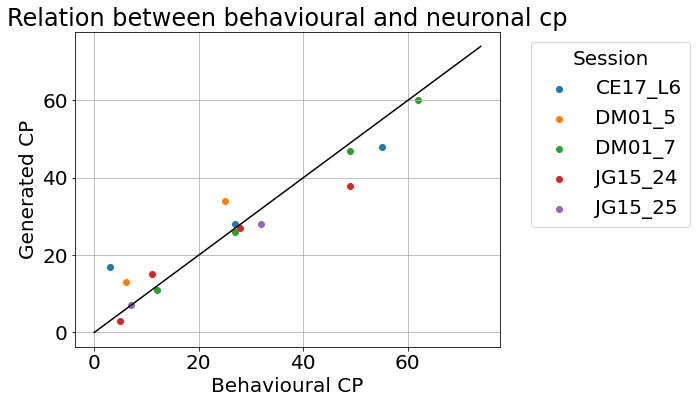

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


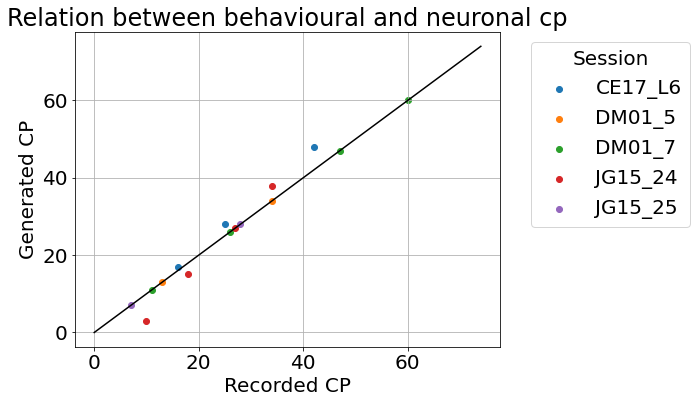

In [12]:
CP_info = {}

# Change points of Neuronal activity
CP_info["cp_mua"] = [11,26,47,60]+[13,34]+[7,28]+[10,18,27,34]+[16,25,42]
# Change points of Model
CP_info["cp_model"] = [11,26,47,60]+[13,34]+[7,28]+[3,15,27,38]+[17,28,48]
# Change points of Behaviour
CP_info["cp_beh"] = [12,27,49,62]+[6,25]+[7,32]+[5,11,28,49]+[3,27,55]
# Change point W parameters
CP_info["cp_w_parameters"] = [16,27,49,65]+[16,32]+[11,28]+[0,16,32,0]+[22,32,48]
# Session
CP_info["session"] = ["DM01_7"]*4+["DM01_5"]*2+["JG15_25"]*2+["JG15_24"]*4+["CE17_L6"]*3

CP_df=pd.DataFrame(CP_info)

# Grouping the DataFrame by session
grouped = CP_df.groupby('session')

# Plotting
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.scatter(group['cp_beh'], group['cp_mua'], label=name)
plt.plot(range(75),range(75),'k')
plt.xlabel('Behavioural CP')
plt.ylabel('Neuronal CP')
plt.title('Relation between behavioural and neuronal cp')
plt.legend(title='Session', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.scatter(group['cp_beh'], group['cp_model'], label=name)
plt.plot(range(75),range(75),'k')
plt.xlabel('Behavioural CP')
plt.ylabel('Generated CP')
plt.title('Relation between behavioural and neuronal cp')
plt.legend(title='Session', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\4_Panel\\Scatter_CP_Model_and_Behaviour.eps")
plt.show()


plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.scatter(group['cp_mua'], group['cp_model'], label=name)
plt.plot(range(75),range(75),'k')
plt.xlabel('Recorded CP')
plt.ylabel('Generated CP')
plt.title('Relation between behavioural and neuronal cp')
plt.legend(title='Session', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\4_Panel\\Scatter_CP_Model_and_Data.eps")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


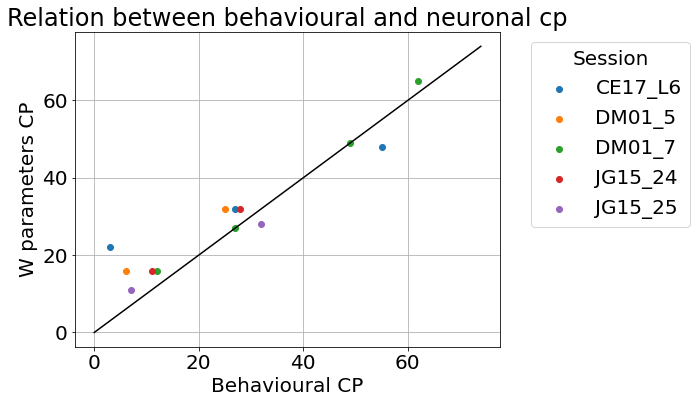

In [13]:
CP_info = {}

# Change points of Neuronal activity
CP_info["cp_mua"] = [11,26,47,60]+[13,34]+[7,28]+[18,27]+[16,25,42]
# Change points of Model
CP_info["cp_model"] = [11,26,47,60]+[13,34]+[7,28]+[5,27]+[17,28,48]
# Change points of Behaviour
CP_info["cp_beh"] = [12,27,49,62]+[6,25]+[7,32]+[11,28]+[3,27,55]
# Change point W parameters
CP_info["cp_w_parameters"] = [16,27,49,65]+[16,32]+[11,28]+[16,32]+[22,32,48]
# Session
CP_info["session"] = ["DM01_7"]*4+["DM01_5"]*2+["JG15_25"]*2+["JG15_24"]*2+["CE17_L6"]*3

CP_df=pd.DataFrame(CP_info)

# Grouping the DataFrame by session
grouped = CP_df.groupby('session')

# Plotting
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.scatter(group['cp_beh'], group['cp_w_parameters'], label=name)
plt.plot(range(75),range(75),'k')
plt.xlabel('Behavioural CP')
plt.ylabel('W parameters CP')
plt.title('Relation between behavioural and neuronal cp')
plt.legend(title='Session', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\5_Panel\\Scatter_CP_Model_and_Behaviour.eps")
plt.show()


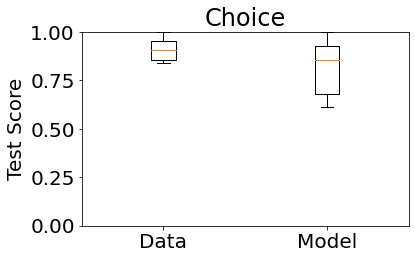

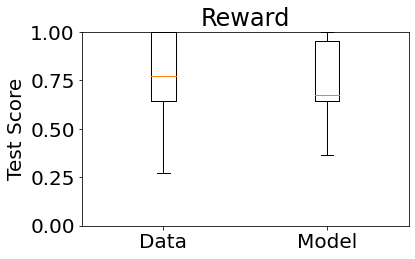

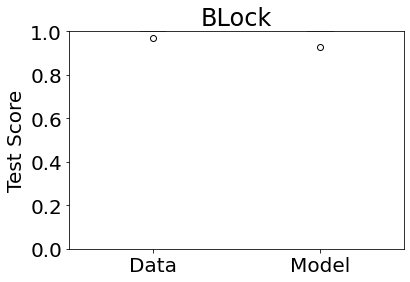

In [10]:

score_data1 = [1.0,0.9090909090909087,0.8387096774193546,0.9545454545454548,0.8571428571428571]
score_model1 = [0.9285714285714288,1.0,0.6129032258064517,0.6818181818181818,0.8571428571428571]

score_data2 = [1.0,0.272727,0.77419,1.0,0.6428]
score_model2 = [1.0,0.363636,0.67741,0.954545454,0.642857]

score_data3 = [1.0,1.0,0.9677419,1.0,1.0]
score_model3 = [1.0,1.0,1.0,1.0,0.928514]



fig, ax = plt.subplots()
Models = ['Data','Model']
ax.boxplot([score_data1,score_model1],labels=Models)
ax.set_ylim([0,1.0])
ax.set_ylabel('Test Score')
ax.set_title('Choice')
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\3_Panel\\Classifier_Choice.eps")
plt.show()


fig, ax = plt.subplots()
Models = ['Data','Model']
ax.boxplot([score_data2,score_model2],labels=Models)
ax.set_ylim([0,1.0])
ax.set_ylabel('Test Score')
ax.set_title('Reward')
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\3_Panel\\Classifier_Reward.eps")
plt.show()



fig, ax = plt.subplots()
Models = ['Data','Model']
ax.boxplot([score_data3,score_model3],labels=Models)
ax.set_ylim([0,1.0])
ax.set_ylabel('Test Score')
ax.set_title('BLock')
plt.show()